In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
custom_colours = ['#74a09e','#98e2c6','#f2a553','#c14953']
colours = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True)
colours_cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set_theme(style="darkgrid",palette=custom_colours)

In [203]:
raw_data = pd.read_csv('../paruvendu_api/outputs/clean_dataset.csv')
df = raw_data.copy()

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15276 entries, 0 to 15275
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         15276 non-null  float64
 1   version          15276 non-null  object 
 2   price            15276 non-null  float64
 3   year             15276 non-null  int64  
 4   mileage          15276 non-null  float64
 5   fuel_type        15276 non-null  object 
 6   emission         15276 non-null  float64
 7   transmission     15276 non-null  object 
 8   door_nb          15276 non-null  float64
 9   technical_power  15276 non-null  float64
 10  seat_nb          15276 non-null  float64
 11  actual_power     15276 non-null  float64
 12  body_type        15276 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 1.5+ MB


<AxesSubplot:>

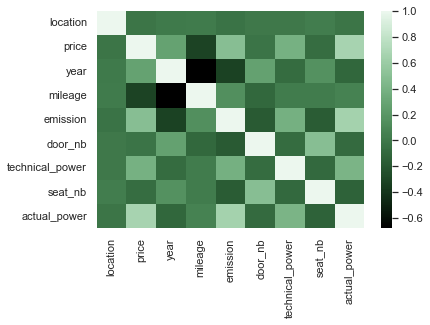

In [205]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix,cmap=colours_cmap)

In [206]:
df_transmission = df.replace('manuelle',0).replace('automatique',1)
df_transmission.head()

,location,version,price,year,mileage,fuel_type,emission,transmission,door_nb,technical_power,seat_nb,actual_power,body_type
0,86.0,dacia/duster,17600.0,2019,18300.0,essence,126.0,0,4.0,7.0,5.0,130.0,4x4
1,59.0,mini/cooper,24990.0,2018,47500.0,essence,119.0,1,2.0,10.0,4.0,192.0,berline
2,53.0,nissan/qashqai,8490.0,2013,166400.0,diesel,129.0,0,4.0,6.0,5.0,110.0,break
3,1.0,nissan/qashqai,16900.0,2016,61500.0,diesel,128.0,1,4.0,7.0,5.0,130.0,4x4
4,30.0,mini/cooper,17900.0,2018,58529.0,diesel,99.0,0,4.0,5.0,5.0,95.0,berline


<AxesSubplot:>

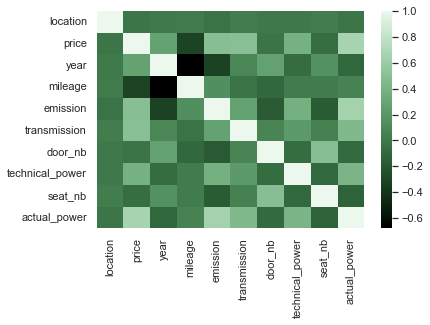

In [207]:
corr_transmission = df_transmission.corr()
sns.heatmap(corr_transmission,cmap=colours_cmap)

In [208]:
df_fuel = df.replace('diesel',1).replace('essence',0)
df_fuel.head()

,location,version,price,year,mileage,fuel_type,emission,transmission,door_nb,technical_power,seat_nb,actual_power,body_type
0,86.0,dacia/duster,17600.0,2019,18300.0,0,126.0,manuelle,4.0,7.0,5.0,130.0,4x4
1,59.0,mini/cooper,24990.0,2018,47500.0,0,119.0,automatique,2.0,10.0,4.0,192.0,berline
2,53.0,nissan/qashqai,8490.0,2013,166400.0,1,129.0,manuelle,4.0,6.0,5.0,110.0,break
3,1.0,nissan/qashqai,16900.0,2016,61500.0,1,128.0,automatique,4.0,7.0,5.0,130.0,4x4
4,30.0,mini/cooper,17900.0,2018,58529.0,1,99.0,manuelle,4.0,5.0,5.0,95.0,berline


<AxesSubplot:>

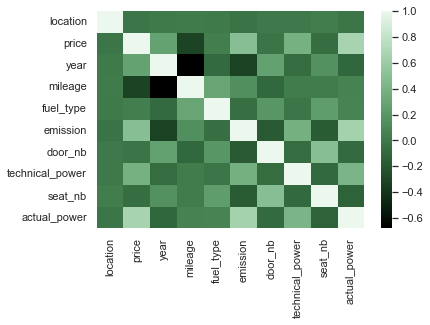

In [209]:
corr_fuel = df_fuel.corr()
sns.heatmap(corr_fuel,cmap=colours_cmap)

Encodage simple : 
-  fuel_type :
    - Diesel -> 1
    - Essence -> 0
-  transmission : 
    - Automatique -> 1
    - Manuelle -> 0

In [210]:
df_coded = df.replace('diesel',1).replace('essence',0).replace('manuelle',0).replace('automatique',1)
df_coded.head()

,location,version,price,year,mileage,fuel_type,emission,transmission,door_nb,technical_power,seat_nb,actual_power,body_type
0,86.0,dacia/duster,17600.0,2019,18300.0,0,126.0,0,4.0,7.0,5.0,130.0,4x4
1,59.0,mini/cooper,24990.0,2018,47500.0,0,119.0,1,2.0,10.0,4.0,192.0,berline
2,53.0,nissan/qashqai,8490.0,2013,166400.0,1,129.0,0,4.0,6.0,5.0,110.0,break
3,1.0,nissan/qashqai,16900.0,2016,61500.0,1,128.0,1,4.0,7.0,5.0,130.0,4x4
4,30.0,mini/cooper,17900.0,2018,58529.0,1,99.0,0,4.0,5.0,5.0,95.0,berline


In [211]:
df_coded['location'] = df_coded['location'].apply(lambda x : int(x/1000))
df_coded.head()

,location,version,price,year,mileage,fuel_type,emission,transmission,door_nb,technical_power,seat_nb,actual_power,body_type
0,0,dacia/duster,17600.0,2019,18300.0,0,126.0,0,4.0,7.0,5.0,130.0,4x4
1,0,mini/cooper,24990.0,2018,47500.0,0,119.0,1,2.0,10.0,4.0,192.0,berline
2,0,nissan/qashqai,8490.0,2013,166400.0,1,129.0,0,4.0,6.0,5.0,110.0,break
3,0,nissan/qashqai,16900.0,2016,61500.0,1,128.0,1,4.0,7.0,5.0,130.0,4x4
4,0,mini/cooper,17900.0,2018,58529.0,1,99.0,0,4.0,5.0,5.0,95.0,berline


In [212]:
df_coded.head()

,location,version,price,year,mileage,fuel_type,emission,transmission,door_nb,technical_power,seat_nb,actual_power,body_type
0,0,dacia/duster,17600.0,2019,18300.0,0,126.0,0,4.0,7.0,5.0,130.0,4x4
1,0,mini/cooper,24990.0,2018,47500.0,0,119.0,1,2.0,10.0,4.0,192.0,berline
2,0,nissan/qashqai,8490.0,2013,166400.0,1,129.0,0,4.0,6.0,5.0,110.0,break
3,0,nissan/qashqai,16900.0,2016,61500.0,1,128.0,1,4.0,7.0,5.0,130.0,4x4
4,0,mini/cooper,17900.0,2018,58529.0,1,99.0,0,4.0,5.0,5.0,95.0,berline


----

In [213]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [214]:
raw_target = df_coded['price']
raw_features = df_coded

In [215]:
ohe_encoder_body_type = OneHotEncoder(sparse=False, drop='first')
encoded_body_type = ohe_encoder_body_type.fit_transform(pd.DataFrame(raw_features.loc[:,'body_type']))
print(len(ohe_encoder_body_type.categories_[0][1:]))
encoded_body_type_df = pd.DataFrame(encoded_body_type, columns=ohe_encoder_body_type.categories_[0][1:])
features = pd.concat([raw_features,encoded_body_type_df],axis=1).drop(columns=['body_type'])

5


In [216]:
print(len(df_coded['body_type'].unique()))

6


In [217]:
ohe_encoder_model = OneHotEncoder(sparse=False, drop='first')
encoded_model = ohe_encoder_model.fit_transform(pd.DataFrame(raw_features.loc[:,'version']))
encoded_model_df = pd.DataFrame(encoded_model, columns=ohe_encoder_model.categories_[0][1:])
features = pd.concat([features,encoded_model_df],axis=1).drop(columns=['version'])

In [218]:
print(len(ohe_encoder_model.categories_[0][1:]))

193


In [219]:
print(len(df_coded['version'].unique()))

194


In [220]:
features.fillna(-1,inplace=True)
features = features.astype('float32')
target = (features['price'])
features.drop(columns=['price'],inplace=True)

In [221]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15276 entries, 0 to 15275
Columns: 208 entries, location to volvo/xc90
dtypes: float32(208)
memory usage: 12.1 MB


----

In [222]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=.33,random_state=69)

In [223]:
from sklearn.linear_model import LinearRegression
lr_estimator = LinearRegression()
lr_estimator.fit(X_train,y_train)

LinearRegression()

In [224]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_estimator = GradientBoostingRegressor()
gbr_estimator.fit(X_train,y_train)

GradientBoostingRegressor()

In [225]:
from sklearn.ensemble import RandomForestRegressor

rfr_estimator = RandomForestRegressor()
rfr_estimator.fit(X_train,y_train)

RandomForestRegressor()

In [226]:
lr_predict = lr_estimator.predict(X_test)
gbr_predict = gbr_estimator.predict(X_test)
rfr_predict = rfr_estimator.predict(X_test)

In [227]:
def R2_AdjR2(y,f,nb_features):
    p = nb_features
    n = len(y)
    SSres = 0
    for i in range(n):
        ei = y[i] - f[i]
        SSres += ei**2
    y_ = (1/n)*sum(y)
    SStot = 0
    for i in range(n):
        SStot += (y[i]-y_)**2
    R2 = 1 - (SSres/SStot)
    dfe = n-p-1
    dft = n-1
    adj_R2 = 1 - (SSres/dfe)/(SStot/dft) # adj_R2 = 1 - (1-R2)*(n-1)/(n-p-1)
    return R2, adj_R2

In [228]:
Y = np.array(y_test)
f = np.array(lr_predict)
R2, adj_R2 = R2_AdjR2(Y,f,lr_estimator.n_features_in_)
print(f"Linear Regression , R² = {R2}, adjusted R² = {adj_R2}")

Linear Regression , R² = 0.7588018484478444, adjusted R² = 0.7484212948532141


In [229]:
Y = np.array(y_test)
f = np.array(gbr_predict)
R2, adj_R2 = R2_AdjR2(Y,f,gbr_estimator.n_features_in_)
print(f"Gradient Boosting Regressor , R² = {R2}, adjusted R² = {adj_R2}")

Gradient Boosting Regressor , R² = 0.8884864663674154, adjusted R² = 0.8836872081436252


In [230]:
Y = np.array(y_test)
f = np.array(rfr_predict)
R2, adj_R2 = R2_AdjR2(Y,f,rfr_estimator.n_features_in_)
print(f"Random Forest Regressor , R² = {R2}, adjusted R² = {adj_R2}")

Random Forest Regressor , R² = 0.8961999310729907, adjusted R² = 0.891732640707417


----

In [231]:
from sklearn.model_selection import learning_curve
lr_curve = learning_curve(lr_estimator,X_train,y_train)
gbr_curve = learning_curve(gbr_estimator,X_train,y_train)
rfr_curve = learning_curve(rfr_estimator,X_train,y_train)

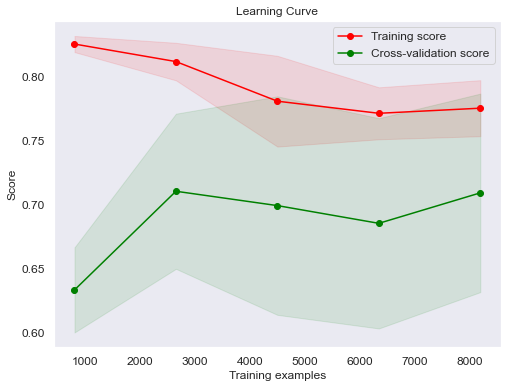

In [232]:
import scikitplot as skplt

skplt.estimators.plot_learning_curve(lr_estimator, X_train, y_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

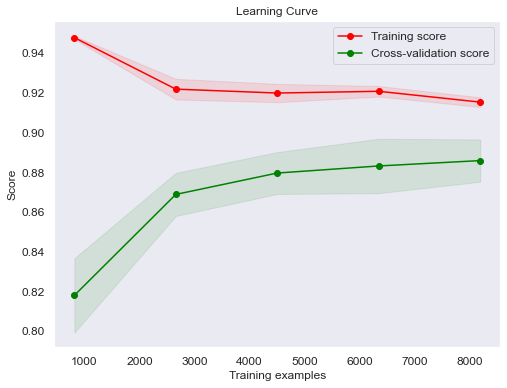

In [233]:
skplt.estimators.plot_learning_curve(gbr_estimator, X_train, y_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

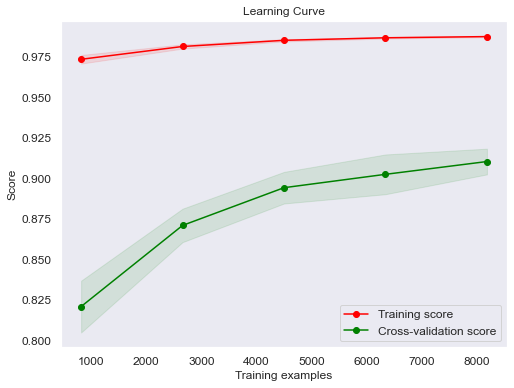

In [234]:
skplt.estimators.plot_learning_curve(rfr_estimator, X_train, y_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

----

In [235]:
from sklearn.model_selection import GridSearchCV, KFold

params = dict(loss=['squared_error','absolute_error','quantile','huber'],criterion=['friedman_mse','squared_error'])
estimator = GradientBoostingRegressor()

cv_sets = KFold(n_splits=10, shuffle=True, random_state=666)
gridsearch = GridSearchCV(estimator, params, cv=cv_sets, scoring='r2', 
verbose=2)

gridsearch.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   2.1s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   2.0s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   2.1s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   2.0s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   2.0s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   2.1s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   2.1s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   2.2s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   2.1s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   2.1s
[CV] END ........criterion=friedman_mse, loss=absolute_error; total time=   2.5s
[CV] END ........criterion=friedman_mse, loss=ab

GridSearchCV(cv=KFold(n_splits=10, random_state=666, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'quantile',
                                  'huber']},
             scoring='r2', verbose=2)

In [236]:
gridsearch.best_params_

{'criterion': 'squared_error', 'loss': 'squared_error'}

In [237]:
best_gbr = gridsearch.best_estimator_
predict = best_gbr.predict(X_test)

In [238]:
Y = np.array(y_test)
f = np.array(predict)
R2, adj_R2 = R2_AdjR2(Y,f,best_gbr.n_features_in_)
print(f"Random Forest Regressor , R² = {R2}, adjusted R² = {adj_R2}")

Random Forest Regressor , R² = 0.8885818377023575, adjusted R² = 0.8837866840177084


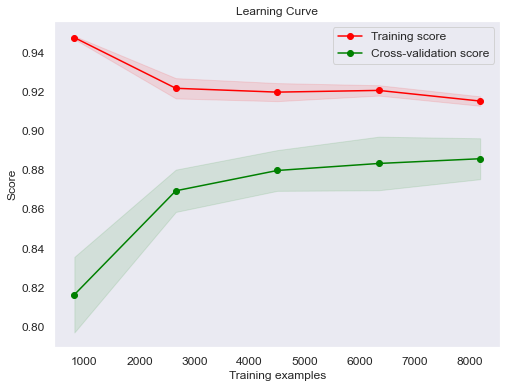

In [239]:
skplt.estimators.plot_learning_curve(best_gbr, X_train, y_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

----

In [240]:
import joblib

model_filename = "../paruvendu_api/outputs/best_GBR.sav"
body_type_encoder_file_name = "../paruvendu_api/outputs/body_type_encoder.sav"
model_encoder_file_name = "../paruvendu_api/outputs/model_encoder.sav"

# joblib.dump(best_gbr,model_filename)
# joblib.dump(ohe_encoder_body_type,body_type_encoder_file_name)
# joblib.dump(ohe_encoder_model,model_encoder_file_name)

----

# SOLUTION DE GROS

In [277]:
from sklearn import model_selection

label = df['price']
feature = df.loc[:, df.columns != 'price']

feature_encoder = OneHotEncoder()

encoded_feature = feature_encoder.fit_transform(feature)

feature_train, feature_test, label_train, label_test = model_selection.train_test_split(encoded_feature, label, test_size=0.30, random_state=69)

In [278]:
from sklearn.linear_model import LinearRegression
lr_estimator = LinearRegression()
lr_estimator.fit(feature_train, label_train)

LinearRegression()

In [279]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_estimator = GradientBoostingRegressor()
gbr_estimator.fit(feature_train, label_train)

GradientBoostingRegressor()

In [280]:
from sklearn.ensemble import RandomForestRegressor

rfr_estimator = RandomForestRegressor()
rfr_estimator.fit(feature_train, label_train)

RandomForestRegressor()

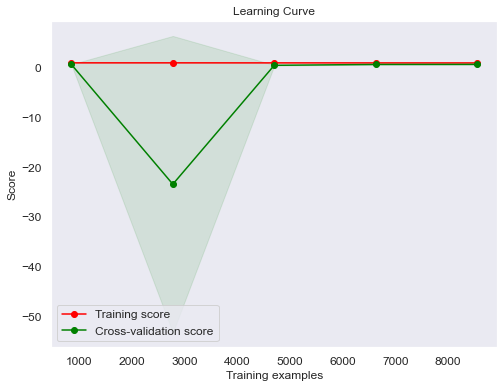

In [281]:
import scikitplot as skplt

skplt.estimators.plot_learning_curve(lr_estimator, feature_train, label_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

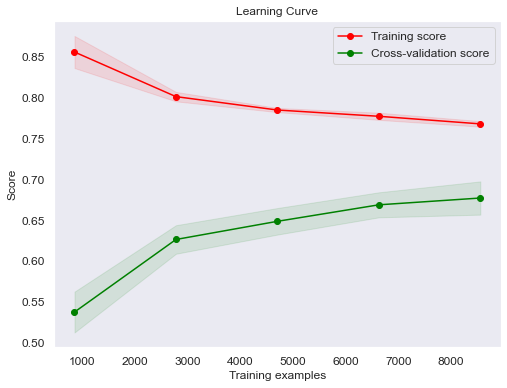

In [282]:
skplt.estimators.plot_learning_curve(gbr_estimator, feature_train, label_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

In [284]:
# skplt.estimators.plot_learning_curve(rfr_estimator, feature_train, label_train, figsize=(8,6))   
# plt.title('Learning Curve')
# plt.show()

In [285]:
from sklearn.model_selection import GridSearchCV, KFold

params = dict(loss=['squared_error','absolute_error','quantile','huber'],criterion=['friedman_mse','squared_error'])
estimator = GradientBoostingRegressor()

cv_sets = KFold(n_splits=10, shuffle=True, random_state=69)
gridsearch = GridSearchCV(estimator, params, cv=cv_sets, scoring='r2', 
verbose=2)

gridsearch.fit(feature_train, label_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   7.3s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   7.3s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   7.3s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   7.4s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   7.3s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   7.3s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   7.3s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   7.3s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   7.3s
[CV] END .........criterion=friedman_mse, loss=squared_error; total time=   7.3s
[CV] END ........criterion=friedman_mse, loss=absolute_error; total time=   7.5s
[CV] END ........criterion=friedman_mse, loss=ab

GridSearchCV(cv=KFold(n_splits=10, random_state=69, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'quantile',
                                  'huber']},
             scoring='r2', verbose=2)

In [286]:
gridsearch.best_params_

{'criterion': 'squared_error', 'loss': 'squared_error'}

In [287]:
best_gbr = gridsearch.best_estimator_
predict = best_gbr.predict(feature_test)

In [288]:
Y = np.array(label_test)
f = np.array(predict)
R2, adj_R2 = R2_AdjR2(Y,f,best_gbr.n_features_in_)
print(f"Random Forest Regressor , R² = {R2}, adjusted R² = {adj_R2}")

Random Forest Regressor , R² = 0.7043507399854674, adjusted R² = 1.3750456559763533


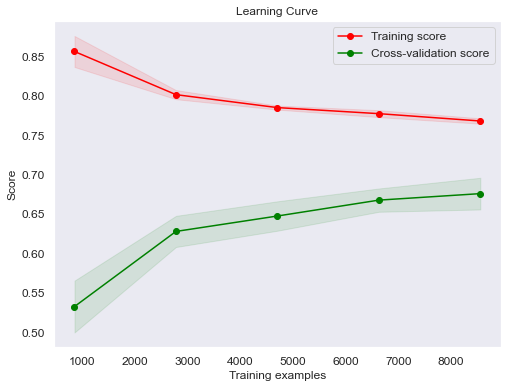

In [289]:
skplt.estimators.plot_learning_curve(best_gbr, feature_train, label_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

In [290]:
import joblib

model_filename = "../paruvendu_api/outputs/best_GBR.sav"
model_encoder_file_name = "../paruvendu_api/outputs/model_encoder.sav"

joblib.dump(best_gbr, model_filename)
joblib.dump(feature_encoder, model_encoder_file_name)

['../paruvendu_api/outputs/model_encoder.sav']